In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import pandas as pd
from stock_pandas import StockDataFrame

In [3]:
stock = StockDataFrame(pd.read_csv('tencent.csv'))
stock['time_key'] = pd.to_datetime(stock['time_key'])
stock = stock.set_index('time_key')
stock

,open,close,high,low,volume,turnover,pe_ratio,turnover_rate,last_close
time_key,,,,,,,,,
2019-10-15,329.4,328.8,331.6,327.6,14202519,4.679499e+09,34.595,0.00149,328.2
2019-10-16,330.0,331.0,332.0,328.0,13953191,4.604689e+09,34.827,0.00146,328.8
2019-10-17,332.8,331.0,332.8,328.4,10339120,3.422302e+09,34.827,0.00108,331.0
2019-10-18,332.0,331.0,334.2,330.2,9904468,3.288990e+09,34.827,0.00104,331.0
2019-10-21,329.6,324.8,330.2,324.8,13947162,4.557080e+09,33.571,0.00146,331.0
...,...,...,...,...,...,...,...,...,...
2020-03-03,393.0,394.0,398.8,393.0,21808968,8.631162e+09,40.723,0.00228,389.6
2020-03-04,396.0,394.0,396.0,390.8,19557990,7.691008e+09,40.723,0.00205,394.0
2020-03-05,398.0,406.2,406.8,394.0,27046138,1.087124e+10,41.984,0.00283,394.0


In [4]:
stock['sma:5']

time_key
2019-10-15       NaN
2019-10-16       NaN
2019-10-17       NaN
2019-10-18       NaN
2019-10-21    329.32
               ...  
2020-03-03    393.68
2020-03-04    392.56
2020-03-05    393.96
2020-03-06    395.92
2020-03-09    394.68
Name: sma:5,close, Length: 100, dtype: float64

In [5]:
import mplfinance as mpf

In [6]:
stock.alias('Open', 'open')
stock.alias('High', 'high')
stock.alias('Low', 'low')
stock.alias('Close', 'close')

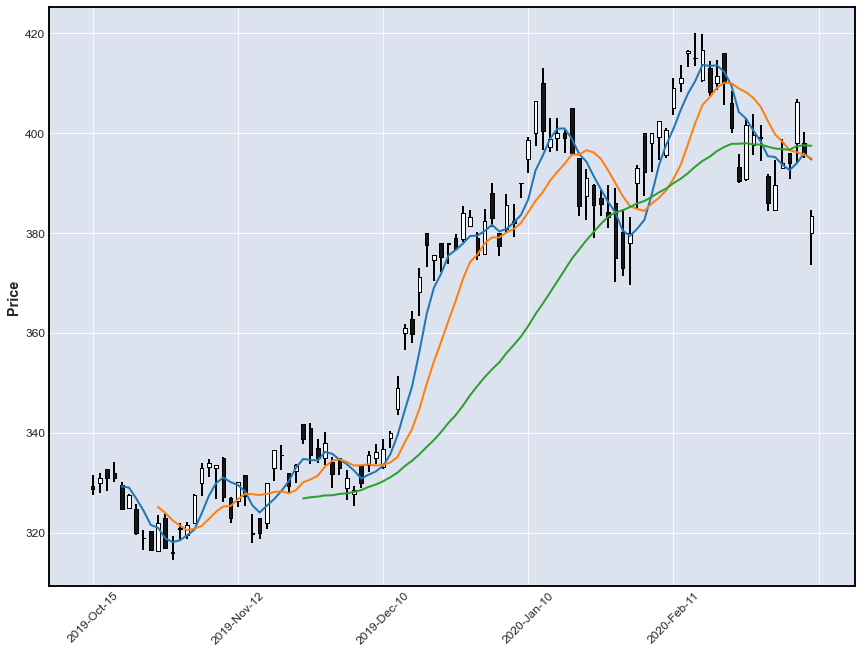

In [9]:
apds = [
    mpf.make_addplot(stock[['sma:5', 'sma:10', 'sma:30']])
]

mpf.plot(stock, type='candle', addplot=apds, figscale=2)